# Circuit resource analysis for Gray code encoding

In [1]:
import numpy as np
np.warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

import sys
sys.path.append("../src/")
from qiskit_circuits import *

np.set_printoptions(precision=6, suppress=True)

Actually generate the ansatz circuits, and use Qiskit to collect the depth, and gate counts. Make sure that they match up with the formulas that we wrote down in the paper.

In [2]:
print("Jordan-Wigner ansatz resource counts (single circuit, computational basis measurement.)\n")
for N in range(2, 8):
    t = np.random.randn(N-1)
    c = sparse_variational_circuit(t,  0, 'statevector_simulator')
    resources = c.decompose().count_ops()
    print(f"N = {N}")
    print(f"Depth = \t{c.depth()}, \t4N - 6 = \t{4*N - 6}")
    print(f"CNOTs = \t{resources['cx']}, \t3N - 5 = \t{3*N - 5}")
    print(f"SQ    = \t{resources['u3'] + resources['r']}, \t2N - 2 = \t{2*N-2}")
    print()

Jordan-Wigner ansatz resource counts (single circuit, computational basis measurement.)

N = 2
Depth = 	2, 	4N - 6 = 	2
CNOTs = 	1, 	3N - 5 = 	1
SQ    = 	2, 	2N - 2 = 	2

N = 3
Depth = 	6, 	4N - 6 = 	6
CNOTs = 	4, 	3N - 5 = 	4
SQ    = 	4, 	2N - 2 = 	4

N = 4
Depth = 	10, 	4N - 6 = 	10
CNOTs = 	7, 	3N - 5 = 	7
SQ    = 	6, 	2N - 2 = 	6

N = 5
Depth = 	14, 	4N - 6 = 	14
CNOTs = 	10, 	3N - 5 = 	10
SQ    = 	8, 	2N - 2 = 	8

N = 6
Depth = 	18, 	4N - 6 = 	18
CNOTs = 	13, 	3N - 5 = 	13
SQ    = 	10, 	2N - 2 = 	10

N = 7
Depth = 	22, 	4N - 6 = 	22
CNOTs = 	16, 	3N - 5 = 	16
SQ    = 	12, 	2N - 2 = 	12



In [3]:
print("Gray-code ansatz resource counts (single circuit, computational basis measurement.)\n")
for N in range(2, 32):
    η = int(np.ceil(np.log2(N)))
    t = np.random.randn(2**η - 1)
    c = dense_variational_circuit(t,  0, 'statevector_simulator')
    #print(c.draw())
    resources = c.decompose().count_ops()
    
    depth =  int(np.ceil((2**η - 1)/η))*(η+1) - 2*η + (2**η-1)%η
    
    print(f"N = {N}")
    print(f"Depth = \t{c.depth()}, \t expr = \t{depth}")
    
    if 'cx' in resources:
        print(f"CNOTs = \t{resources['cx']}, \t 2^η-η-1 = \t{2**η-η-1}")
        
    print(f"SQ    = \t{resources['r']}, \t 2^η-1 = \t{(2**η-1)}")
    print()

Gray-code ansatz resource counts (single circuit, computational basis measurement.)

N = 2
Depth = 	1, 	 expr = 	0
SQ    = 	1, 	 2^η-1 = 	1

N = 3
Depth = 	3, 	 expr = 	3
CNOTs = 	1, 	 2^η-η-1 = 	1
SQ    = 	3, 	 2^η-1 = 	3

N = 4
Depth = 	3, 	 expr = 	3
CNOTs = 	1, 	 2^η-η-1 = 	1
SQ    = 	3, 	 2^η-1 = 	3

N = 5
Depth = 	7, 	 expr = 	7
CNOTs = 	4, 	 2^η-η-1 = 	4
SQ    = 	7, 	 2^η-1 = 	7

N = 6
Depth = 	7, 	 expr = 	7
CNOTs = 	4, 	 2^η-η-1 = 	4
SQ    = 	7, 	 2^η-1 = 	7

N = 7
Depth = 	7, 	 expr = 	7
CNOTs = 	4, 	 2^η-η-1 = 	4
SQ    = 	7, 	 2^η-1 = 	7

N = 8
Depth = 	7, 	 expr = 	7
CNOTs = 	4, 	 2^η-η-1 = 	4
SQ    = 	7, 	 2^η-1 = 	7

N = 9
Depth = 	15, 	 expr = 	15
CNOTs = 	11, 	 2^η-η-1 = 	11
SQ    = 	15, 	 2^η-1 = 	15

N = 10
Depth = 	15, 	 expr = 	15
CNOTs = 	11, 	 2^η-η-1 = 	11
SQ    = 	15, 	 2^η-1 = 	15

N = 11
Depth = 	15, 	 expr = 	15
CNOTs = 	11, 	 2^η-η-1 = 	11
SQ    = 	15, 	 2^η-1 = 	15

N = 12
Depth = 	15, 	 expr = 	15
CNOTs = 	11, 	 2^η-η-1 = 	11
SQ    = 	15, 	 2^η-1 = 	15

N 

In [4]:
# Let's check in terms of η
print("Gray-code ansatz resource counts (single circuit, computational basis measurement.)\n")
for η in range(2, 10):
    t = np.random.randn(2**η - 1)
    c = dense_variational_circuit(t,  0, 'statevector_simulator')
    #print(c.draw())
    resources = c.decompose().count_ops()
    
    depth =  int(np.ceil((2**η - 1)/η))*(η+1) - 2*η + (2**η-1)%η
    
    print(f"η = {η}")
    print(f"Depth = \t{c.depth()}, \t expr = \t{depth}")
    
    if 'cx' in resources:
        print(f"CNOTs = \t{resources['cx']}, \t 2^η-η-1 = \t{2**η-η-1}")
        
    print(f"SQ    = \t{resources['r']}, \t 2^η-1 = \t{(2**η-1)}")
    print()

Gray-code ansatz resource counts (single circuit, computational basis measurement.)

η = 2
Depth = 	3, 	 expr = 	3
CNOTs = 	1, 	 2^η-η-1 = 	1
SQ    = 	3, 	 2^η-1 = 	3

η = 3
Depth = 	7, 	 expr = 	7
CNOTs = 	4, 	 2^η-η-1 = 	4
SQ    = 	7, 	 2^η-1 = 	7

η = 4
Depth = 	15, 	 expr = 	15
CNOTs = 	11, 	 2^η-η-1 = 	11
SQ    = 	15, 	 2^η-1 = 	15

η = 5
Depth = 	33, 	 expr = 	33
CNOTs = 	26, 	 2^η-η-1 = 	26
SQ    = 	31, 	 2^η-1 = 	31

η = 6
Depth = 	68, 	 expr = 	68
CNOTs = 	57, 	 2^η-η-1 = 	57
SQ    = 	63, 	 2^η-1 = 	63

η = 7
Depth = 	139, 	 expr = 	139
CNOTs = 	120, 	 2^η-η-1 = 	120
SQ    = 	127, 	 2^η-1 = 	127

η = 8
Depth = 	279, 	 expr = 	279
CNOTs = 	247, 	 2^η-η-1 = 	247
SQ    = 	255, 	 2^η-1 = 	255

η = 9
Depth = 	559, 	 expr = 	559
CNOTs = 	502, 	 2^η-η-1 = 	502
SQ    = 	511, 	 2^η-1 = 	511



## Plots

Now let's make some plots and do a comparison of total gate count and circuit depth.

In [5]:
min_N = 2
max_N = 512

gates_jw = [18*N - 21 for N in range(min_N, max_N)]
gates_gc = []
for N in range(min_N, max_N):
    η = np.ceil(np.log2(N))
    gates_gc.append(2*(η+1)*(2**η-1) - η**2)

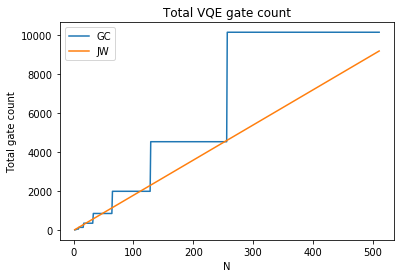

In [6]:
plt.plot(range(min_N, max_N), gates_gc, label="GC")
plt.plot(range(min_N, max_N), gates_jw, label="JW")
plt.xlabel("N")
plt.ylabel("Total gate count")
plt.title("Total VQE gate count")
plt.legend();

In [7]:
min_N = 2
max_N = 1024

cnots_jw = [3*(3*N - 5) for N in range(min_N, max_N)]
cnots_gc = []
for N in range(min_N, max_N):
    η = np.ceil(np.log2(N))
    cnots_gc.append((η+1)*(2**η-η-1))

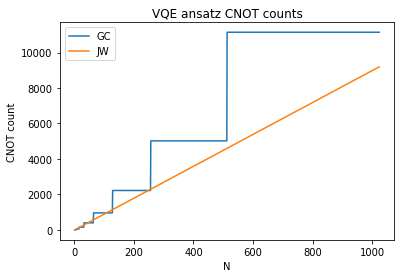

In [8]:
plt.plot(range(min_N, max_N), cnots_gc, label="GC")
plt.plot(range(min_N, max_N), cnots_jw, label="JW")
plt.xlabel("N")
plt.ylabel("CNOT count")
plt.title("VQE ansatz CNOT counts")
plt.legend();

We notice that after $N=256$, the GC encoding uses consistently more gates Before that point, it still used less gates for $N$ that were powers of 2.

In [9]:
# Now the depth...
depth_jw = [4*N - 6 for N in range(min_N, max_N)]
depth_gc = []
for N in range(min_N, max_N):
    η = np.ceil(np.log2(N))
    depth_gc.append(int(np.ceil((2**η - 1)/η))*(η+1) - 2*η + (2**η-1)%η)

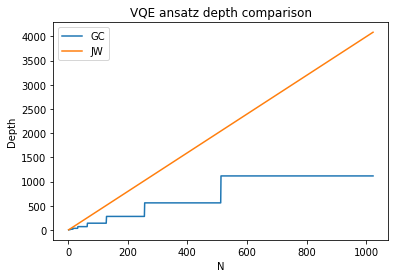

In [10]:
plt.plot(range(min_N, max_N), depth_gc, label="GC")
plt.plot(range(min_N, max_N), depth_jw, label="JW")
plt.xlabel("N")
plt.ylabel("Depth")
plt.title("VQE ansatz depth comparison")
plt.legend();

The ansatz used for the GC encoding always has lower depth, even though the number of gates is higher.